## **Introduction**

- Decision trees is a concept which summarizes the information contained in training dataset in form of a tree structure. 
- It is a supervised predictive learning model.
- It can be used to classify both categorical (classification) as well as continuous valued (regression) target variables.
- One of the many qualities of Decision trees is that they require very little data preparation. In fact, they don't require feature scaling or centering at all.

<p align = "center"><img src="Images/Decision Tree examples.png"  width="600" height="400"></p>
<center>Reference: Hands on Machine Learning with Scikit-learn and Tensorflow</center>

Above is the example of a decision tree on Iris dataset. 
- Decision tree is built on two features of Iris dataset, namely 'Petal Length' and 'Petal Width'.
- <b>Each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class.</b>
-  Gini impurity is a function that determines how well a decision tree was split. Basically, it helps us to determine which splitter is best so that we can build a pure decision tree.
-  CART (Classification and Regression Trees) uses gini as their cost function.
-  Another decision tree, say, ID3 (Iterative Dichotomiser 3) uses entropy function to calculate the information gain metric.

Do not stress after reading those powerful words. We will cover them up but as for now we would mainly focus on gini impurity as our cost function.

**Important note:**
- The lower the Gini the better the split.
- Machine learning comes into play in decision trees when we have to decide which features has to be chosen as our root node of our decision trees and which features to come next in the child nodes.
- Shorter the decision tree the better accuracy it will give as it reduces overfitting of the data.

## **How to calculate Gini?**

Gini measures the node's impurity. A node is "pure" (gini=0) if all training instances it applies to belong to same class.

Below is the formula for calculating gini impurity for a node

$$G_i = 1 - \sum_{k=1} ^ {n} p_{i,k}^2$$

In this equation: p is the ratio of class k instances among the training instances in the i node.<br>
Let's calculate the gini impurity for the root node of the decision tree provided above.

$$G = 1 - [(50/150)^2 + (50/150)^2 + (50/150)^2]$$
$$G = 1 - [(1/3)^2 + (1/3)^2) + (1/3)^2)]$$
$$G = 1 - [0.1111 + 0.1111 + 0.1111]$$
$$G = 1 - 0.3333$$
$$G = 0.667$$

I hope you got the main idea about the calculation for the impurity. You can assess yourself by computing the gini impurity for the other nodes of the tree above.

## **Implementing Decision Trees**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# reading the iris dataset
df = pd.read_csv(r"Data set\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# number of samples in the dataset
len(df)

150

In [4]:
# number of columns in the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# checking for null values
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

<AxesSubplot:>

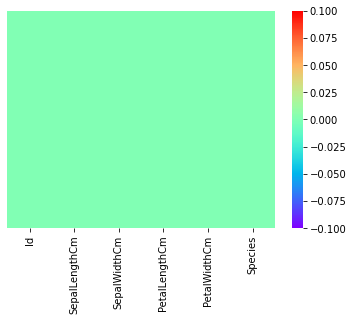

In [6]:
# checking for null values through visualization
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

We can see that there are no null/missing values in the dataset. So we are good to go!

In [7]:
# let us consider the all columns for classification
col = ['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']
x = df[col]
x

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [8]:
# our target column
y = df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
# number of classes in the dataset
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# splitting the dataset into the training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
# number of samples in training dataset
x_train.shape[0]

112

In [12]:
# number of samples in testing set
x_test.shape[0]

38

In [13]:
# definning our model
model = tree.DecisionTreeClassifier(splitter='random')

Splitter helps us to determine the strategy to choose the best split at each node. Supported strategies are 'best' to choose the best split and 'random' to select the random best split.

In [14]:
# fitting our model
model.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

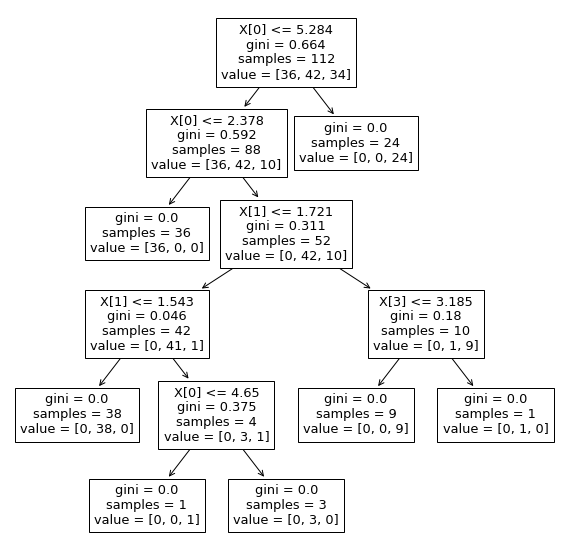

In [15]:
# plotting the model in the form of tree
plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

In [16]:
# predicting the values with the help of unseen data (test data)
y_pred = model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [17]:
# computing the accuracy of the model
accuracy_score(y_test,y_pred)

0.8947368421052632

This is how you can implement decision tree on a classification dataset.

## **Why Random Forest is better?**

- A random forest is simply a collection of decision trees whose results are aggregated into one final result. 
- By using the multiple trees it reduces the chance of overfitting.
- It gives more accurate results as compared to decision trees.
- It has complex visualization but it plays an important role to show the hidden patterns behind data.
  
The disadvantages Random Forest bring with it are:

- Random Forest is more complicated to interpret.
- We have to generate, process and analyze trees so that this process is slow.

Let's implement it!

In [18]:
# For implementing random forest, we need to import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# For assigning numerical values to categorical columns we need a label encoder
from sklearn.preprocessing import LabelEncoder

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [19]:
# definning our model
model = RandomForestClassifier(n_estimators=5)

In [20]:
# fitting our model
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [21]:
# our x_test 
x_test.shape

(38, 4)

In [22]:
# predicting using our model
y_pred = model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [23]:
# computing the accuracy
accuracy_score(y_test,y_pred)

0.9473684210526315

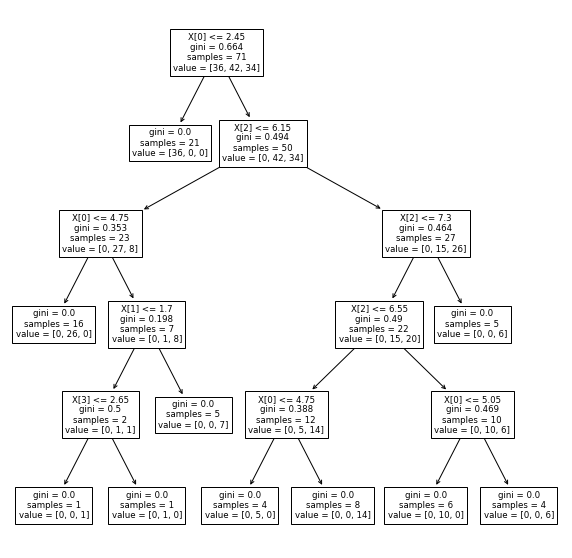

In [24]:
# plotting the model in the form of tree
plt.figure(figsize=(10,10))
tree.plot_tree(model.estimators_[0])
plt.show()

This is how you can implement Random Forest!

I hope you have enjoyed the process. Keep learning!!